<a href="https://colab.research.google.com/github/Collokd/IP-Week-6-Collins/blob/master/Independent_Project_Week_6%2C_Collins_Kemboi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis_Week_6_IP

> ## 1. Defining the Question

### a) Specifying the Question

Developing a model to determine goals scored by the home team. The modeling will deploy the use of Polynomial and Logistic Regressions.

### b) Defining the Metric for Success
1. Developing an accurate model for predicting home goals

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [0]:
# Loading the necessary libraries
# 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import pandas.util.testing as tm
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


In [0]:
# Loading the data

ranking = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

In [0]:
# Previewing ranking dataset

ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [0]:
ranking['country_full'].unique() 

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'IR Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahr

In [0]:
# Previewing results data
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [0]:
# Renaming rank_date column on ranking dataset to date 
#

ranking.rename(columns = {'rank_date': 'date'}, inplace = True)

In [0]:
ranking.columns # Confirm the change above

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date'],
      dtype='object')

In [0]:
# We now merge our two datsets with respect to date

data = pd.merge(ranking, results, on='date', how='inner')

## 3. Checking the Data

In [0]:
# Previewing our merged dataset

data.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False


In [0]:
# Determining the no. of records in our dataset


data.shape

(212831, 24)

In [0]:
# Checking details on our dataset data
#

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212831 entries, 0 to 212830
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rank                     212831 non-null  int64  
 1   country_full             212831 non-null  object 
 2   country_abrv             212831 non-null  object 
 3   total_points             212831 non-null  float64
 4   previous_points          212831 non-null  int64  
 5   rank_change              212831 non-null  int64  
 6   cur_year_avg             212831 non-null  float64
 7   cur_year_avg_weighted    212831 non-null  float64
 8   last_year_avg            212831 non-null  float64
 9   last_year_avg_weighted   212831 non-null  float64
 10  two_year_ago_avg         212831 non-null  float64
 11  two_year_ago_weighted    212831 non-null  float64
 12  three_year_ago_avg       212831 non-null  float64
 13  three_year_ago_weighted  212831 non-null  float64
 14  conf

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

In [0]:
# Previewing columns on our dataset
#
data.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'city',
       'country', 'neutral'],
      dtype='object')

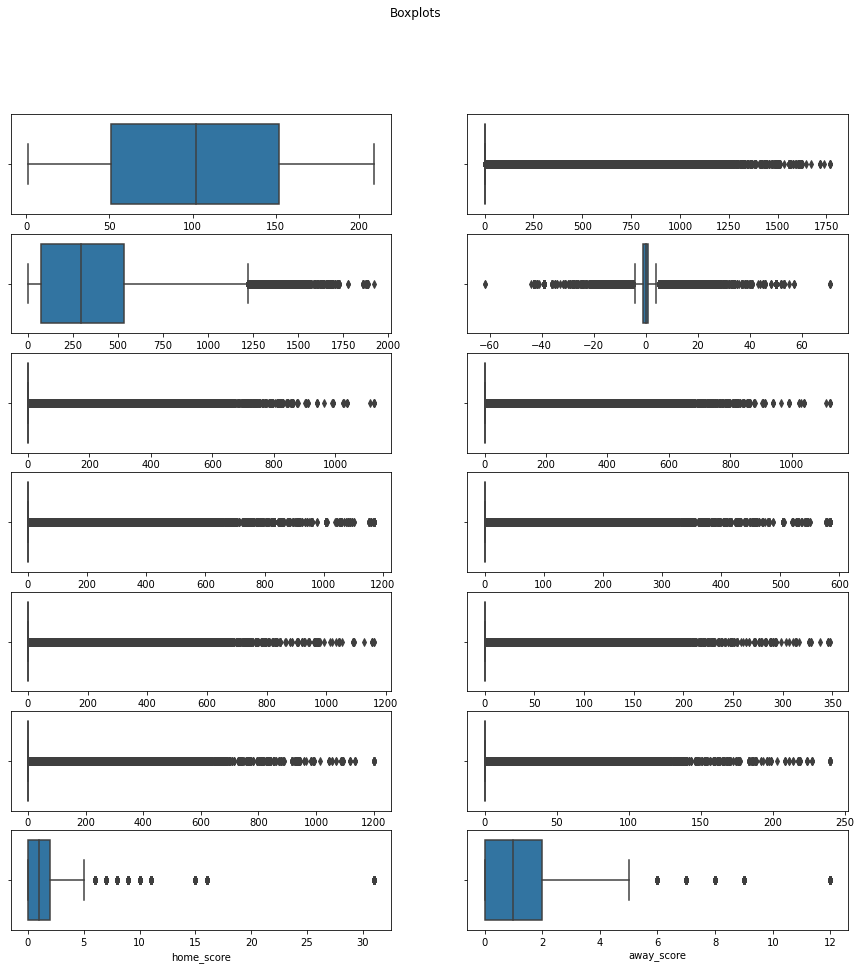

In [0]:
# Checking for Outliers
#
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7,2, figsize=(15, 15))
fig.suptitle('Boxplots')

sns.boxplot(data['rank'], ax=ax1)
sns.boxplot(data['total_points'], ax=ax2)
sns.boxplot(data['previous_points'], ax=ax3)
sns.boxplot(data['rank_change'], ax=ax4)
sns.boxplot(data['cur_year_avg'], ax=ax5)
sns.boxplot(data['cur_year_avg_weighted'], ax=ax6)
sns.boxplot(data['last_year_avg'], ax=ax7)
sns.boxplot(data['last_year_avg_weighted'], ax=ax8)
sns.boxplot(data['two_year_ago_avg'], ax=ax9)
sns.boxplot(data['two_year_ago_weighted'], ax=ax10)
sns.boxplot(data['three_year_ago_avg'], ax=ax11)
sns.boxplot(data['three_year_ago_weighted'], ax=ax12)
sns.boxplot(data['home_score'], ax=ax13)
sns.boxplot(data['away_score'], ax=ax14)
plt.show()

In [0]:
# Identifying Outliers on our dataset using Z-test
#
numeric = data[['rank','total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted','last_year_avg',
                    'last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted',
                    'three_year_ago_avg','three_year_ago_weighted','home_score','away_score']]

from scipy import stats
z = np.abs(stats.zscore(numeric))
print(z)


[[1.71993775 0.25987631 0.96321448 ... 0.24562647 0.66897049 0.03739112]
 [1.71993775 0.25987631 0.96321448 ... 0.24562647 0.34624341 0.03739112]
 [1.71993775 0.25987631 0.96321448 ... 0.24562647 1.68418439 0.83239512]
 ...
 [1.77567766 0.25987631 1.15638182 ... 0.24562647 1.17657744 0.83239512]
 [1.77567766 0.25987631 1.15638182 ... 0.24562647 0.66897049 0.75761288]
 [1.77567766 0.25987631 1.15638182 ... 0.24562647 1.17657744 0.75761288]]


In [0]:
# Dropping outliers identified
new_df= numeric[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {numeric.shape[0]}")
print(f"New dataframe size: {new_df.shape[0]}")

Previous dataframe size : 212831
New dataframe size: 190808


In [0]:
# Checking total missing data from our combined datafram
#

data.isnull().sum()


# There are no missing values from our dataset


rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
dtype: int64

In [0]:

# checking for duplicates

print(data.duplicated())
print('**************************************************************')
data.duplicated().sum()

0         False
1         False
2         False
3         False
4         False
          ...  
212826    False
212827    False
212828    False
212829    False
212830    False
Length: 212831, dtype: bool
**************************************************************


33

In [0]:
# dropping duplicate values 
data.drop_duplicates(keep=False,inplace=True)

In [0]:
#Checking if duplicates have been dropped

data.duplicated().sum()

0

## 6. Exploratory Data Analysis



In [0]:
# Recap of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212765 entries, 0 to 212830
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rank                     212765 non-null  int64  
 1   country_full             212765 non-null  object 
 2   country_abrv             212765 non-null  object 
 3   total_points             212765 non-null  float64
 4   previous_points          212765 non-null  int64  
 5   rank_change              212765 non-null  int64  
 6   cur_year_avg             212765 non-null  float64
 7   cur_year_avg_weighted    212765 non-null  float64
 8   last_year_avg            212765 non-null  float64
 9   last_year_avg_weighted   212765 non-null  float64
 10  two_year_ago_avg         212765 non-null  float64
 11  two_year_ago_weighted    212765 non-null  float64
 12  three_year_ago_avg       212765 non-null  float64
 13  three_year_ago_weighted  212765 non-null  float64
 14  conf

In [0]:
# Dropping clumns that we do not need for our analysis
data = data.drop(['country_abrv','date','confederation','city','neutral'], axis = 1)
data.head()

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,country
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia
1,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,Mexico,1,1,Friendly,Brazil
2,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador
3,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Guinea,Sierra Leone,1,0,Friendly,Guinea
4,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212765 entries, 0 to 212830
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rank                     212765 non-null  int64  
 1   country_full             212765 non-null  object 
 2   total_points             212765 non-null  float64
 3   previous_points          212765 non-null  int64  
 4   rank_change              212765 non-null  int64  
 5   cur_year_avg             212765 non-null  float64
 6   cur_year_avg_weighted    212765 non-null  float64
 7   last_year_avg            212765 non-null  float64
 8   last_year_avg_weighted   212765 non-null  float64
 9   two_year_ago_avg         212765 non-null  float64
 10  two_year_ago_weighted    212765 non-null  float64
 11  three_year_ago_avg       212765 non-null  float64
 12  three_year_ago_weighted  212765 non-null  float64
 13  home_team                212765 non-null  object 
 14  away

 # a). Univariate Analysis

In [0]:
data.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,212765.000000,212765.000000,212765.000000,212765.000000,212765.000000,212765.000000,212765.000000,212765.000000,212765.000000,212765.000000,212765.000000,212765.000000,212765.000000,212765.000000
mean,101.862454,42.517230,341.243015,-0.009771,21.461544,21.461544,21.078558,10.539299,20.954054,6.286222,21.151177,4.230256,1.682086,1.046869
std,58.653561,163.871488,295.124948,4.537261,85.347835,85.347835,89.714101,44.857086,84.555038,25.366516,86.270404,17.254109,1.969737,1.257346
min,1.000000,0.000000,0.000000,-62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,71.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,102.000000,0.000000,297.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,152.000000,0.000000,531.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,209.000000,1770.060000,1920.000000,71.000000,1126.040000,1126.040000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000,31.000000,12.000000


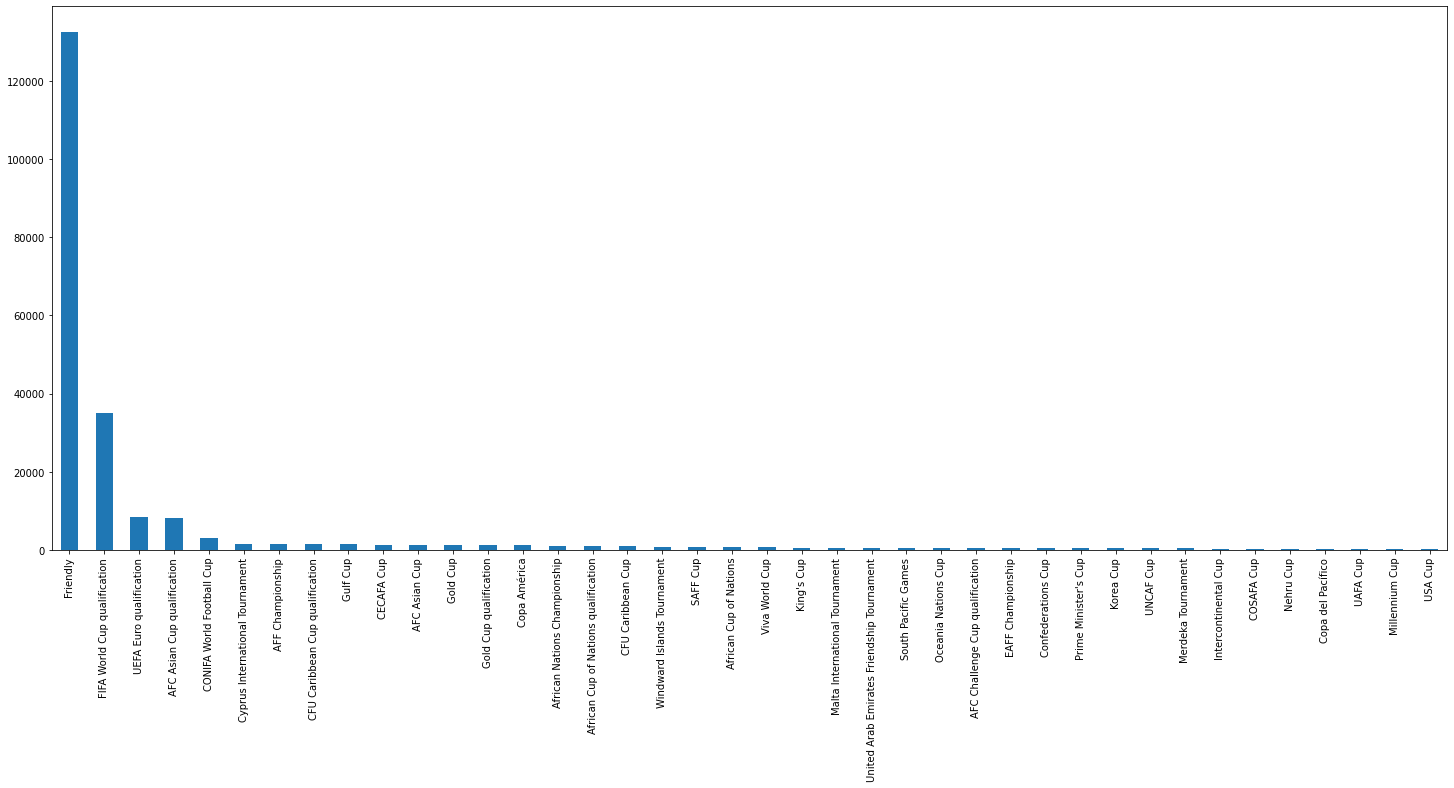

In [0]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
data['tournament'].value_counts().plot.bar()


We observe the most played type of tournament is Friendly games followed by Fifa world cup qualification games. This is because different teams have there own tournaments and friendly gaming is the only tp cross play.

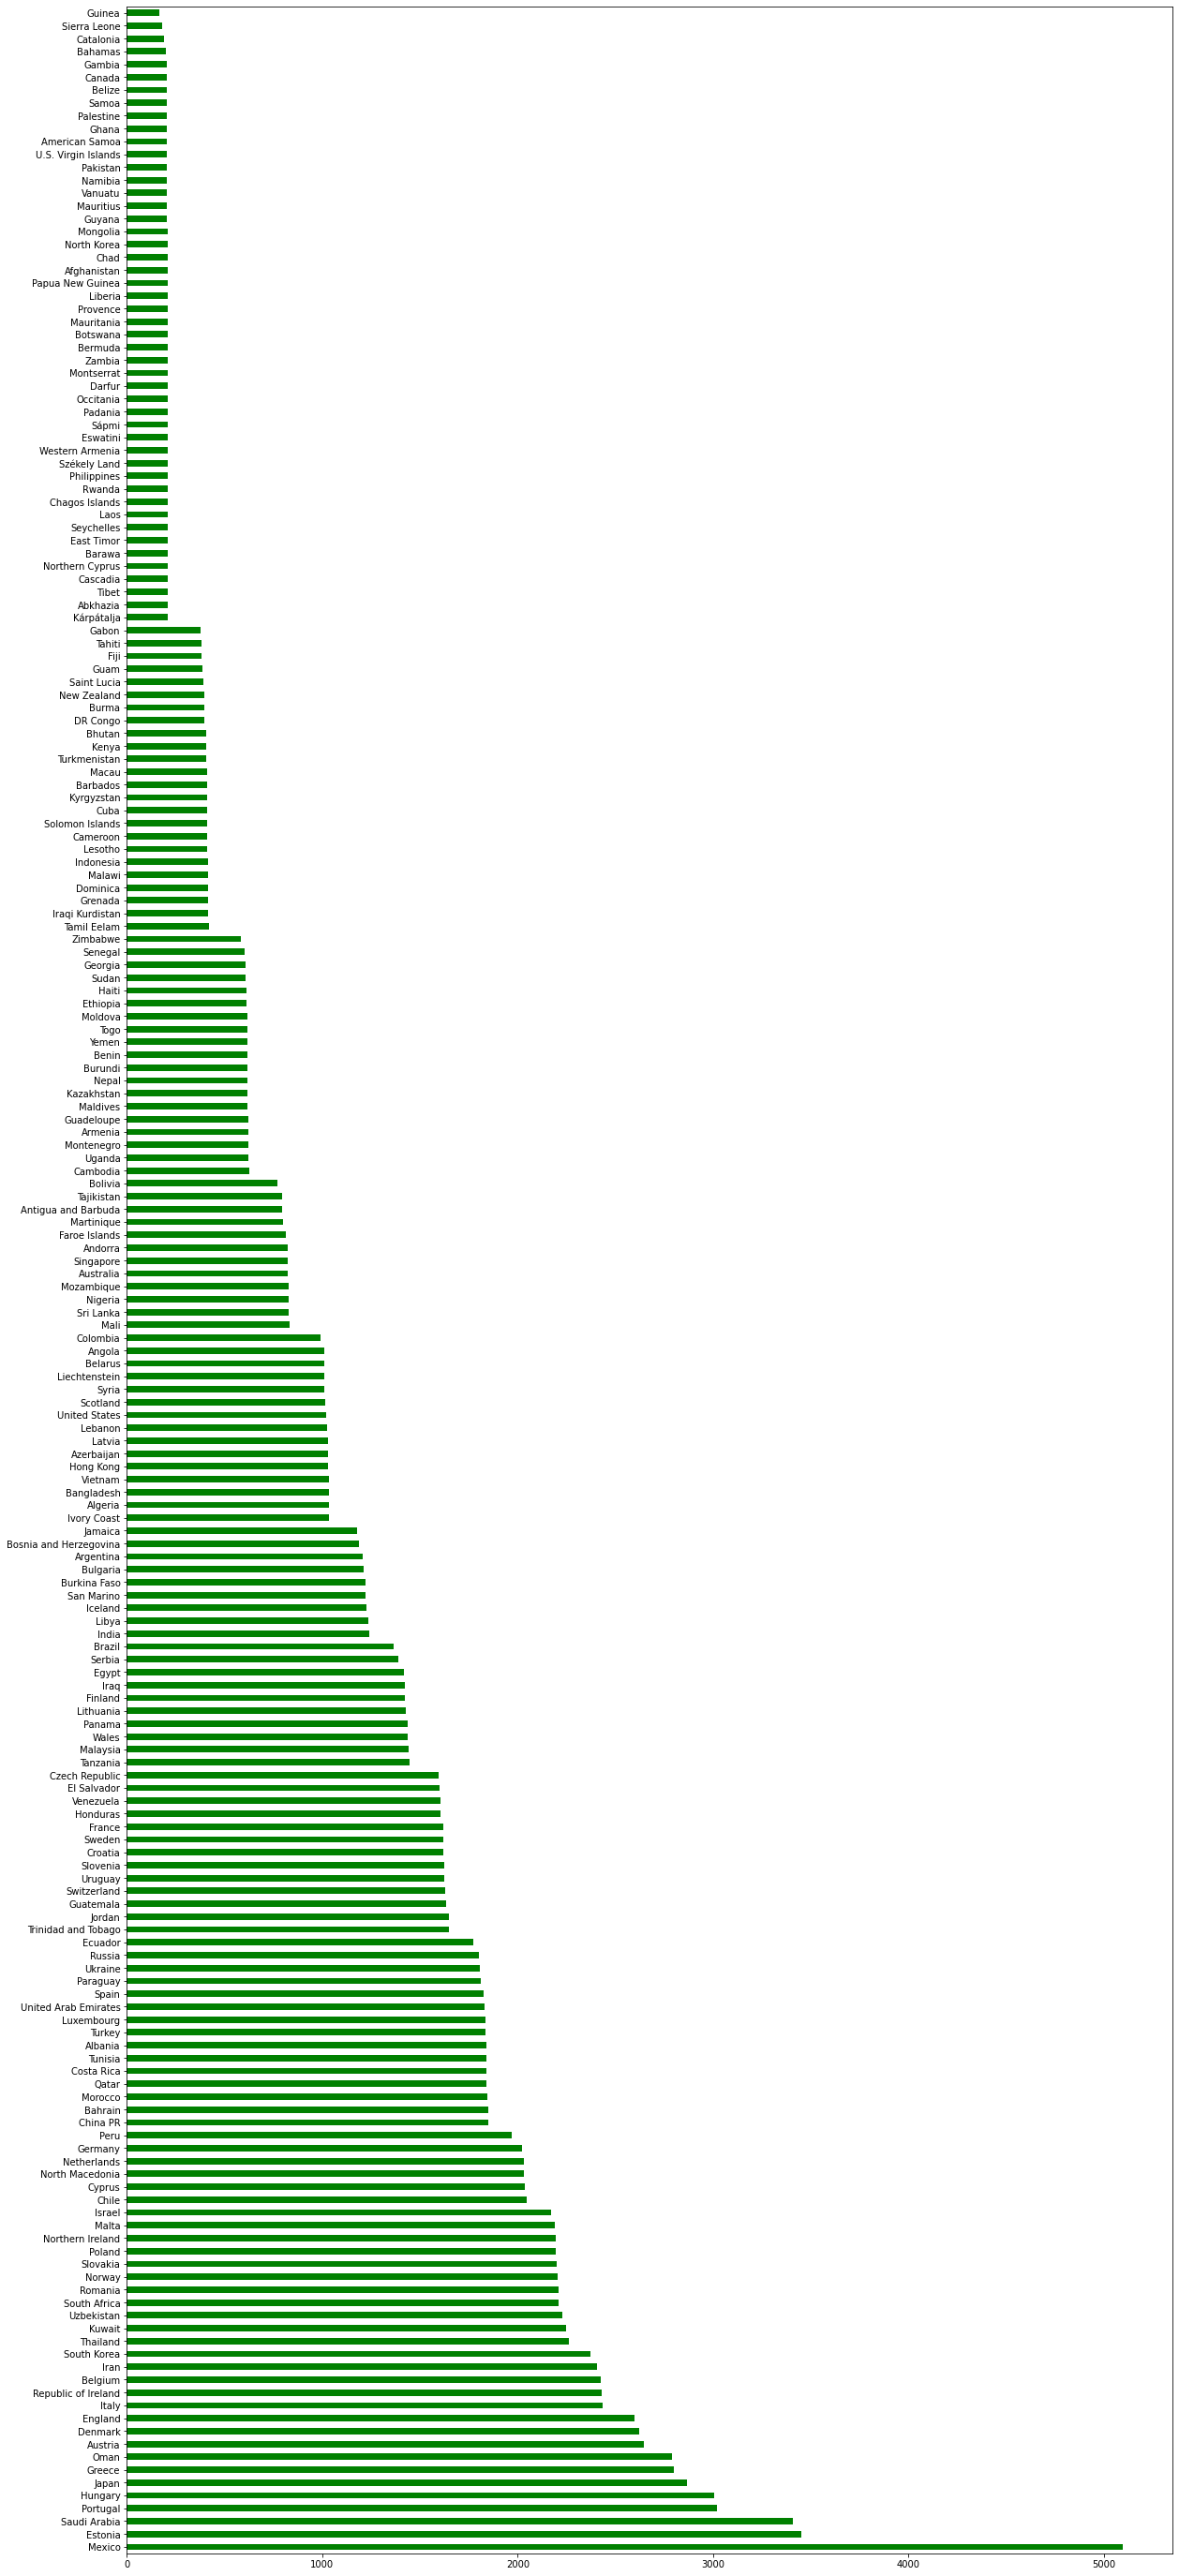

In [0]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(20,50))
data['home_team'].value_counts().plot.barh(color = 'green')

**Observation** 
Mexico hosted the highest games whereas Guniea hosted the least.

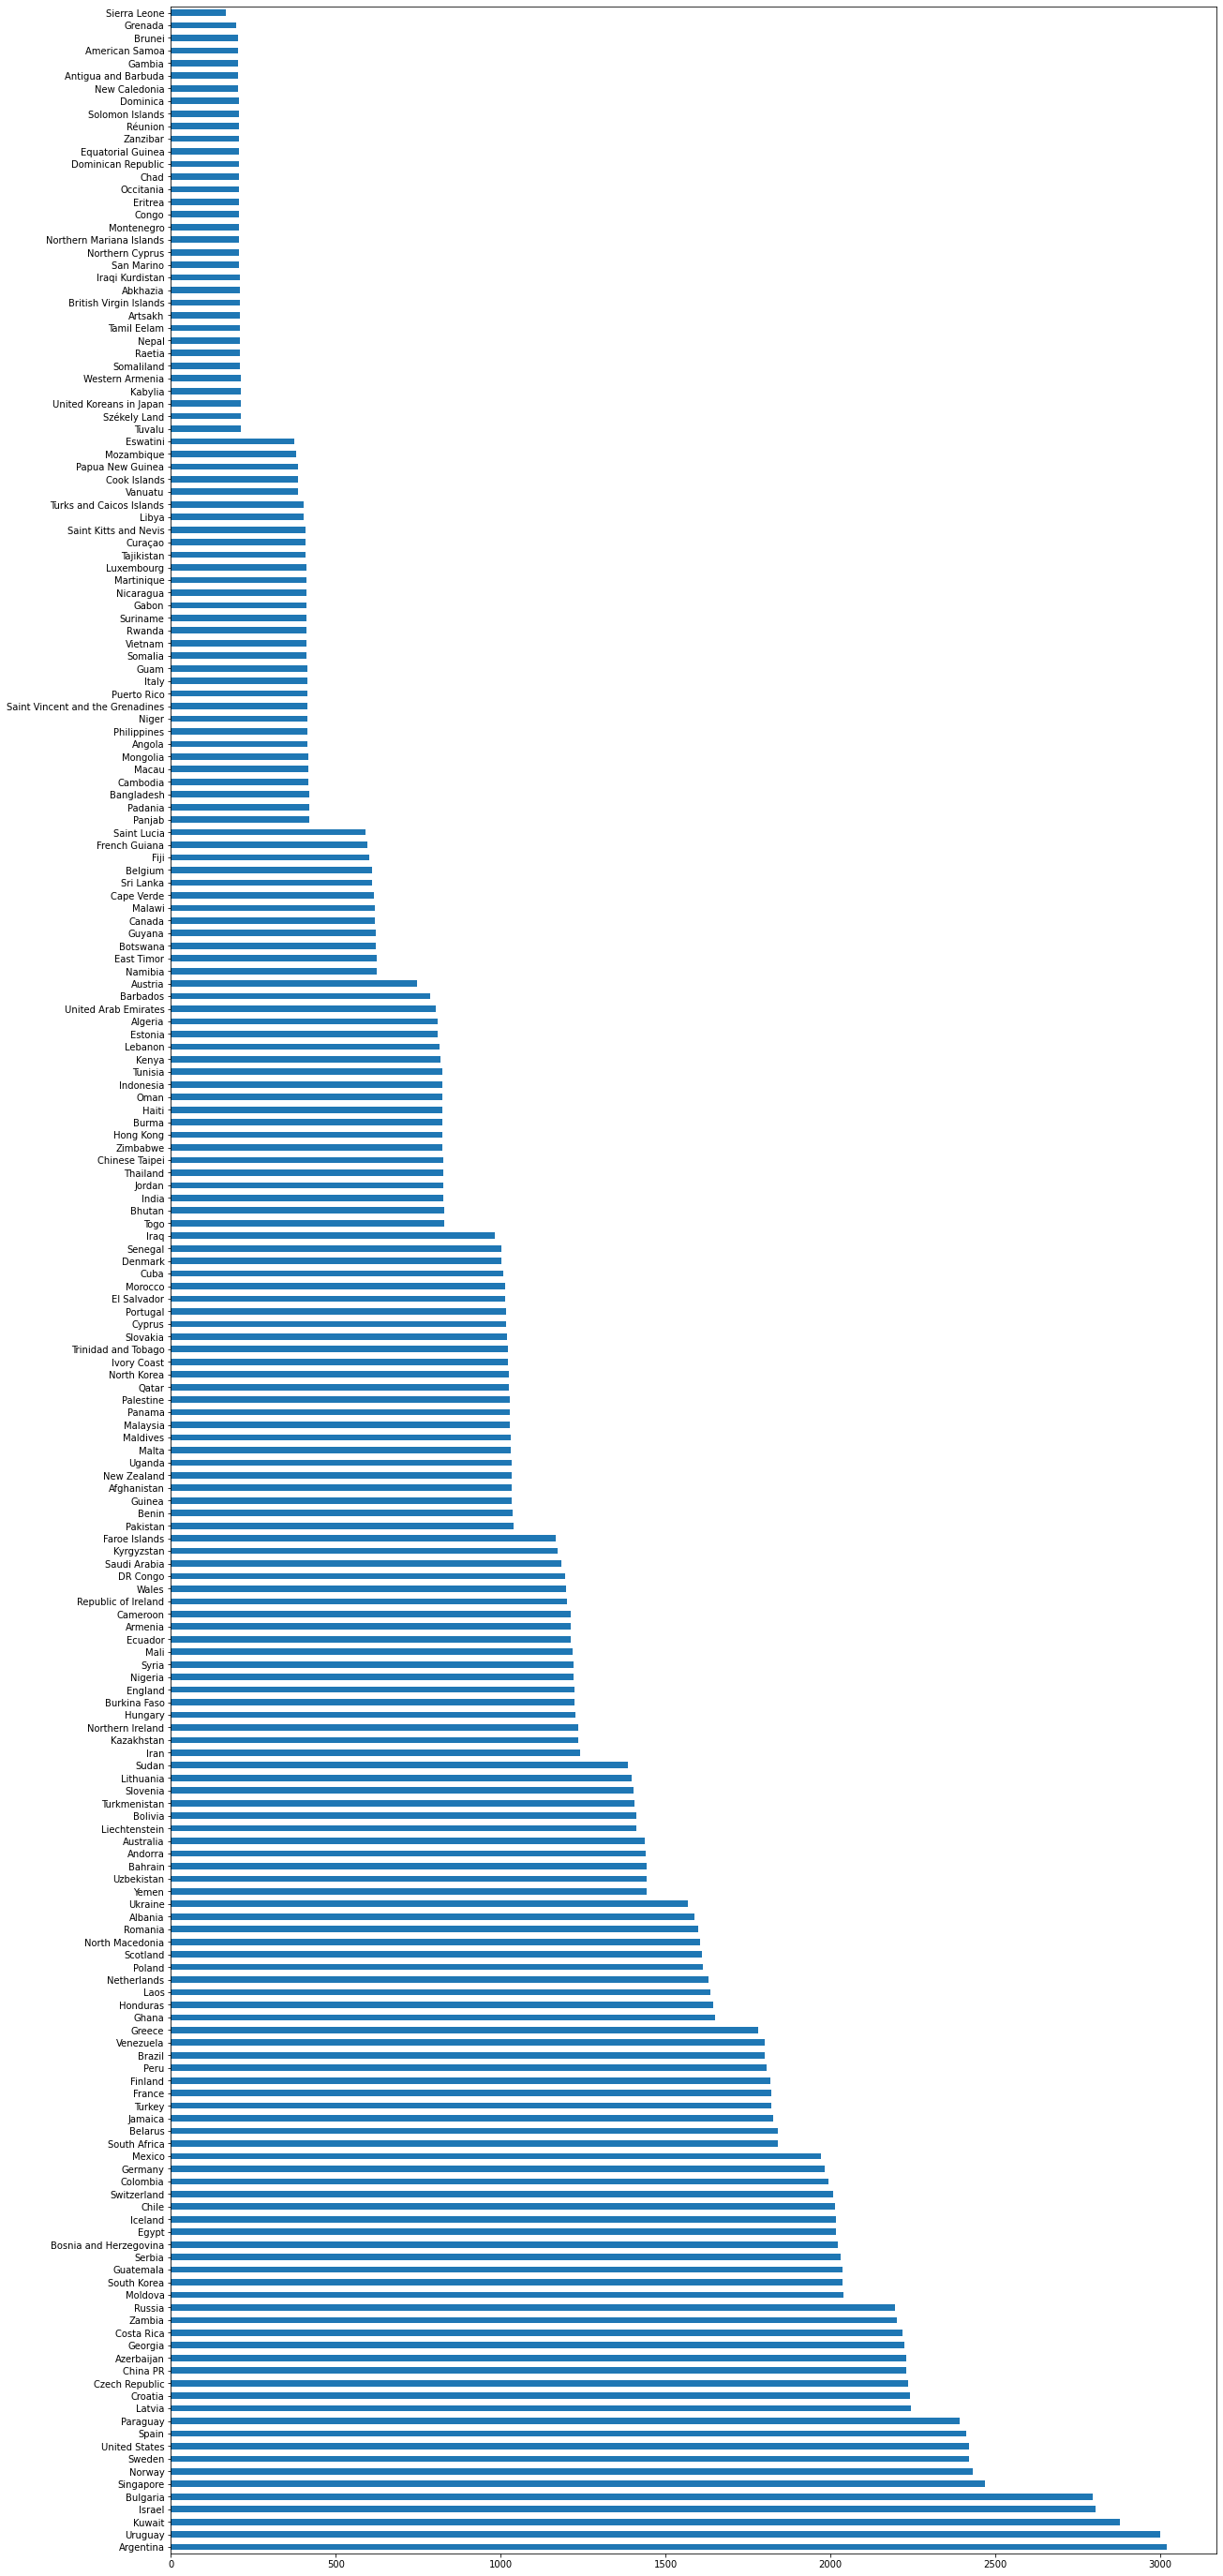

In [0]:
plt.figure(figsize=(20,50))
data['away_team'].value_counts().plot.barh()

**Observation**
Argentina played the most games away while Siera Leon played the least.

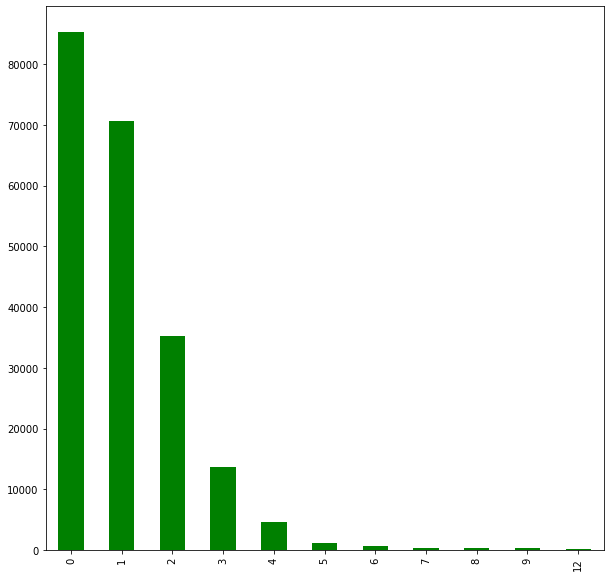

In [0]:
plt.figure(figsize=(10,10))
data['away_score'].value_counts().plot.bar(color = 'green')

**Observation** 
Teams playing away are likely to score no goals.

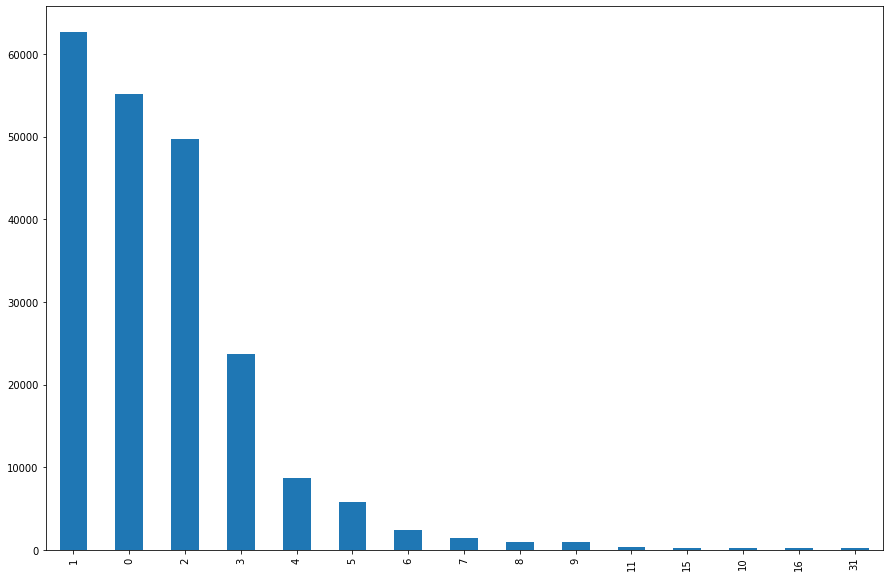

In [0]:
plt.figure(figsize=(15,10))
data['home_score'].value_counts().plot.bar()

**Observation**
Home teams are more likely to score at least one goal.

In [0]:
data.columns

Index(['rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'country'],
      dtype='object')

In [0]:
data


,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,country
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia
1,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,Mexico,1,1,Friendly,Brazil
2,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador
3,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Guinea,Sierra Leone,1,0,Friendly,Guinea
4,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212826,206,Tonga,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,England
212827,206,Tonga,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barawa,Panjab,0,5,CONIFA World Football Cup,England
212828,206,Tonga,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,England
212829,206,Tonga,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,England


In [0]:
data.columns

Index(['rank', 'country_full', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'country'],
      dtype='object')

In [0]:
data1 = data[['rank', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
             'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'away_score']]

In [0]:
data1.head(1)

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,away_score
0,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Multicollinearity Test

In [0]:
# Detecting Multicollinearity on the predictor variables & Checking for multicollinearity on the independent variables only

independent = data1
correlations = independent.corr()
correlations

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,away_score
rank,1.000000,-0.191567,-0.760986,-0.040395,-0.187637,-0.187637,-0.180796,-0.180795,-0.172195,-0.172195,-0.168073,-0.168072,-0.000836
total_points,-0.191567,1.000000,0.291093,0.008677,0.970790,0.970790,0.929693,0.929693,0.927185,0.927185,0.915383,0.915384,0.019831
previous_points,-0.760986,0.291093,1.000000,-0.022351,0.282222,0.282222,0.277580,0.277579,0.263553,0.263553,0.259538,0.259538,-0.009360
rank_change,-0.040395,0.008677,-0.022351,1.000000,0.016598,0.016598,0.001392,0.001392,-0.003506,-0.003507,0.001844,0.001844,0.000046
cur_year_avg,-0.187637,0.970790,0.282222,0.016598,1.000000,1.000000,0.831256,0.831256,0.858944,0.858945,0.849710,0.849710,0.014944
cur_year_avg_weighted,-0.187637,0.970790,0.282222,0.016598,1.000000,1.000000,0.831256,0.831256,0.858944,0.858945,0.849710,0.849710,0.014944
last_year_avg,-0.180796,0.929693,0.277580,0.001392,0.831256,0.831256,1.000000,1.000000,0.857439,0.857438,0.857601,0.857601,0.024160
last_year_avg_weighted,-0.180795,0.929693,0.277579,0.001392,0.831256,0.831256,1.000000,1.000000,0.857439,0.857438,0.857601,0.857601,0.024160
two_year_ago_avg,-0.172195,0.927185,0.263553,-0.003506,0.858944,0.858944,0.857439,0.857439,1.000000,1.000000,0.857861,0.857861,0.019646
two_year_ago_weighted,-0.172195,0.927185,0.263553,-0.003507,0.858945,0.858945,0.857438,0.857438,1.000000,1.000000,0.857861,0.857861,0.019646


In [0]:
# Computing the Variance Inflation Factor, new df with inverse correlation

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,away_score
rank,2.401664e+00,1.173376e+03,1.854415e+00,1.388332e-01,-2.489791e+08,2.766522e+08,-1.211729e+02,-2.001090e+02,1.255934e+02,-3.058580e+02,1.595342e+02,-2.894151e+02,2.113355e-02
total_points,-2.206007e+03,1.304976e+10,1.268461e+03,3.353734e+02,-5.148507e+16,5.148506e+16,-2.072395e+09,-1.499774e+09,1.373996e+09,-3.394039e+09,-7.288526e+09,5.914530e+09,7.692643e+02
previous_points,1.854639e+00,-6.003761e+02,2.527103e+00,1.348316e-01,3.549958e+09,-3.551868e+09,-5.525118e+02,7.166674e+02,-6.328824e+01,1.561372e+02,3.586258e+02,-2.953169e+02,3.308099e-02
rank_change,1.383785e-01,9.459563e+02,1.350427e-01,1.010289e+00,-6.971962e+09,6.975952e+09,-8.743401e+01,-1.715316e+02,9.976661e+01,-2.460466e+02,-9.120935e+02,8.121371e+02,1.405272e-03
cur_year_avg,1.428222e+11,1.183811e+17,-8.684178e+10,4.174184e+10,2.167453e+24,-2.167453e+24,-1.116189e+16,-2.124231e+16,-1.316502e+17,1.133254e+17,2.527371e+17,-2.652021e+17,-6.837724e+10
cur_year_avg_weighted,-1.428222e+11,-1.183812e+17,8.684178e+10,-4.174184e+10,-2.167453e+24,2.167453e+24,1.116189e+16,2.124231e+16,1.316502e+17,-1.133254e+17,-2.527371e+17,2.652021e+17,6.837724e+10
last_year_avg,3.766961e+02,-1.923968e+09,-8.375988e+02,2.249424e+01,7.571997e+15,-7.571996e+15,2.321184e+09,-1.794527e+09,-2.025732e+08,5.003945e+08,1.082643e+09,-8.800697e+08,-2.572031e+02
last_year_avg_weighted,2.271129e+02,-1.648186e+09,4.901899e+02,-1.142970e+02,6.521155e+15,-6.521154e+15,-1.753900e+09,2.205064e+09,-1.735353e+08,4.286669e+08,9.124672e+08,-7.389319e+08,4.660028e+01
two_year_ago_avg,1.295896e+03,-7.692977e+08,-5.693032e+02,2.303281e+01,1.801409e+16,-1.801409e+16,1.645778e+08,4.600852e+07,-8.099335e+07,2.000774e+08,2.250444e+09,-2.169451e+09,-5.762100e+02
two_year_ago_weighted,-9.544182e+02,-1.250743e+09,3.729424e+02,-7.489002e+01,-1.004445e+16,1.004445e+16,1.562190e+08,1.861494e+08,-1.316947e+08,3.253036e+08,-1.122215e+09,1.253910e+09,4.571306e+02


In [0]:
# Residual Plots and Heteroscedasticity Test

# Splitting our data into training and test sets

from sklearn.model_selection import KFold, cross_val_score, train_test_split


X = independent.values
y = data['home_score'].values

X_train, X_test, home_score_train, home_score_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Fitting our training data in our model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, home_score_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# This is our prediction for price based on our model
home_score_predict = regressor.predict(X_test)

In [0]:
# We create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(home_score_predict, home_score_test)

# Let's describe our residual:
x = pd.DataFrame(residuals).describe()
x

,0
count,42553.000000
mean,-0.014239
std,1.985530
min,-29.188694
25%,-0.557170
50%,0.417890
75%,1.088978
max,3.129885


In [0]:
# Getting the mean for the residuals
residuals.mean()


-0.014239021440189525

In [0]:
#The Residual Plot

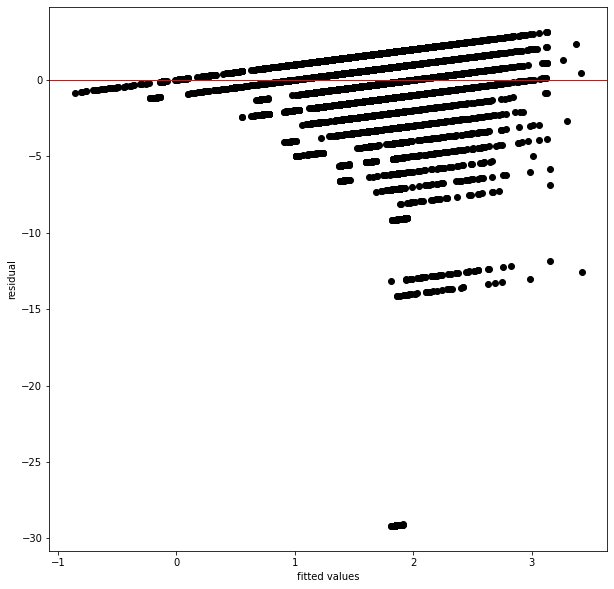

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.scatter(home_score_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [0]:
#Barlett's Test of Heteroscedasticity

In [0]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(home_score_predict, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(home_score_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed.')
else:
  print('The variances are homogeneous.')

inf
The variances are homogeneous.


> ### Polynomial Regression Analysis

Home goals

In [0]:
# Defining our dataset

y = data.home_score


In [0]:
X = data1



In [0]:
X

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,away_score
0,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212826,206,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
212827,206,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
212828,206,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
212829,206,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#test_size=0.2: we will split our dataset (10 observations) into 2 parts (training set, test set) and the ratio of test set compare to dataset is 0.2 
# (2 observations will be put into the test set. You can put it 1/5 to get 20% or 0.2, they are the same. We should not let the test set too big; if 
# it’s too big, we will lack of data to train. Normally, we should pick around 5% to 30%.

In [0]:
#standardize our data

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
# We will first apply linear Regression model to our data

from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,  y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#checking coefficients of linear regration

coef = pd.DataFrame(regressor.coef_, X.columns, columns = ['coefficients'])

coef.sort_values(by = ['coefficients'], ascending = False)

,coefficients
cur_year_avg,872.257910
cur_year_avg_weighted,872.257910
two_year_ago_avg,579.527716
last_year_avg_weighted,461.424185
last_year_avg,455.944822
three_year_ago_weighted,380.968485
rank_change,-0.003318
rank,-0.010942
previous_points,-0.052048
away_score,-0.286593


In [0]:
#making predictions using our model

y_pred = regressor.predict(X_test)

In [0]:
# Describing both our predicted and actual values

comparison_frame = pd.DataFrame({'Actual':y_test, 'predicted':y_pred.flatten()})

comparison_frame.describe()

,Actual,predicted
count,42553.000000,42553.000000
mean,1.693676,1.679188
std,2.011214,3.029450
min,0.000000,-44.699648
25%,0.000000,2.077473
50%,1.000000,2.312091
75%,2.000000,2.511389
max,31.000000,18.093893


In [0]:
# Calculating the accuracy of our model
from sklearn import metrics

print('Accuracy:', regressor.score(X_test, y_test))

# our predictions is not accurate

Accuracy: -2.3876859085573963


In [0]:
# How often is our classiffier correct

print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

# from the RMSE we can see that our model is not very accurate 
# We'll perform other operations to imporove our model

RMSE: 1.4199026585803614


In [0]:
X.shape

(212765, 13)

In [0]:
y.shape

(212765,)

In [0]:
X.columns

Index(['rank', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'away_score'],
      dtype='object')

In [0]:
# Import Polynomial model
# We will only include fields which have a positive correlation coefficieent
# As they can explain the model on there own

from sklearn.preprocessing import PolynomialFeatures


X = data1
y = data.home_score


# We will split our dataframe into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 50)


#standardize our data

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#import polynomial model
from sklearn.preprocessing import PolynomialFeatures

# Fit polynomial Regression to the dataset

poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X_train)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)


y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

from sklearn import metrics
# print(metrics.accuracy_score(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# #from the model created we can see that the RMSE value has impoved as compared to LR

# # But the model created has a high RMSES hence might not be very accurate in predicting goals scored.


81395.74488608762


### Logistic Regression

In [0]:
X = data1
y = data.home_score

# We will split our dataframe into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [0]:
#standardize our data

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
# Creating the logistic regression model

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()



In [0]:
# Creating regularization penalty space
penalty = ['l1', 'l2']


In [0]:
# # Creating regularization hyperparameter space
C = np.logspace(0.1, 1, 10, 100, 1000)

In [0]:
# # Creating hyperparameter options
hyperparameters = dict(C=C, penalty = penalty)

In [66]:
# Training and Cross Validation
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=logistic, X=X_train, y=y_train, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
# Creating grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV
gr_sr  = GridSearchCV(estimator = logistic, param_grid = hyperparameters, scoring = 'accuracy' ,cv=5, verbose=0, n_jobs=-1)


In [68]:
#Calling the fit method
gr_sr.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([   1.99526231,    3.98107171,    7.94328235,   15.84893192,
         31.6227766 ,   63.09573445,  125.89254118,  251.18864315,
        501.18723363, 1000.        ]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='ac

In [69]:
# Checking the parameters that return the highest accuracy
# To do so, we print the sr.best_params_ attribute of the GridSearchCV object, as shown below:
best_parameters = gr_sr.best_params_
print(best_parameters)


{'C': 501.18723362727235, 'penalty': 'l2'}


In [70]:
#Finding the obtained accuracy
best_result = gr_sr.best_score_
print('accuracy=', best_result)

accuracy= 0.30644138250124103


In [0]:
# #Initiate logistic regression with the calculated hyper parameters
# # fit data to logistic regression
# logistic = LogisticRegression(C= XXXXXXXXXXXXX, penalty= 'XX' )
# logistic.fit(X_train, y_train)


In [0]:
# #use our model to predict
# y_pred = logistic.predict(X_test)
# #Test our model

In [0]:
# from sklearn.metrics import confusion_matrix

# con = confusion_matrix(y_test, y_pred)
# print(con)
# print(metrics.r2_score(y_test, y_pred))

# # The logistic model, has been able to predict, xxxxxxxxxxxx correct predictions